## Import Libraries

In [1]:
# Import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Step1: Data Exploration




### Understanding the data

In [2]:
data = pd.read_csv('train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
housing = data.copy()

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Fixing Null Values

In [6]:
# Calculate number of null records
housing['LotFrontage'].isnull().sum() #259 records

# Fixing null values
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace = True)

housing['LotFrontage'].isnull().sum()

0

In [7]:
# Calculate number of null records
housing['Alley'].isnull().sum() #1369 records

# Fixing null values
housing['Alley'].fillna("NA", inplace = True)

print(housing['Alley'].isnull().sum())

0


In [8]:
# Calculate number of null records
housing['MasVnrArea'].isnull().sum() #872 records

# Fixing null values
housing['MasVnrArea'].fillna(0, inplace = True)

print(housing['MasVnrArea'].isnull().sum())

0


In [9]:
# Calculate number of null records
housing['MasVnrType'].isnull().sum() #872 records

# Fixing null values
housing['MasVnrType'].fillna("None", inplace = True)

housing['MasVnrType'].isnull().sum()

0

In [10]:
# Calculate number of null records
housing['BsmtQual'].isnull().sum() #37 records

# Fixing null values
housing['BsmtQual'].fillna("NA", inplace = True)

housing['BsmtQual'].isnull().sum()

0

In [11]:
# Calculate number of null records
housing['BsmtCond'].isnull().sum() #37 records

# Fixing null values
housing['BsmtCond'].fillna("NA", inplace = True)

housing['BsmtQual'].isnull().sum()

0

In [12]:
#Total null records of BsmtExposure are 38 and 1 record look suspicious

# Identifying the record that has Basement and Basement exposure as NULL
housing.query("BsmtExposure.isnull() & BsmtCond != 'No Basement'")  # 1 record

# Fixing null value for above record with 'No'
housing.loc[948,'BsmtExposure'] = 'No'

# Calculate number of null records
housing['BsmtExposure'].isnull().sum() #37 records

# Fixing null values
housing['BsmtExposure'].fillna("NA", inplace = True)

housing['BsmtExposure'].isnull().sum()

0

In [13]:
# Calculate number of null records
housing['BsmtFinType1'].isnull().sum() #37 records

# Fixing null values
housing['BsmtFinType1'].fillna("NA", inplace = True)

housing['BsmtFinType1'].isnull().sum()

0

In [14]:
#Total null records of BsmtExposure are 38 and 1 record look suspicious

# Identifying the record that has Basement and Basement exposure as NULL
housing.query("BsmtFinType2.isnull() & BsmtExposure == 'No'")  # 1 record

# # Fixing null value for above record with 'No'
housing.loc[332,'BsmtFinType2'] = 'Unf'

# Calculate number of null records
housing['BsmtFinType2'].isnull().sum() #37 records

# Fixing null values
housing['BsmtFinType2'].fillna("NA", inplace = True)

housing['BsmtFinType2'].isnull().sum()


0

In [15]:
# Calculate number of null records
housing['Electrical'].isnull().sum() #1 record

# Fixing null values
housing['Electrical'].fillna(housing['Electrical'].mode()[0], inplace = True)

housing['Electrical'].isnull().sum()

0

In [16]:
# Calculate number of null records
housing['FireplaceQu'].isnull().sum() #690 record

# Fixing null values
housing['FireplaceQu'].fillna("NA", inplace = True)

housing['FireplaceQu'].isnull().sum()

0

In [17]:
# Calculate number of null records
housing['GarageType'].isnull().sum() #81 record

# Fixing null values
housing['GarageType'].fillna("NA", inplace = True)

housing['GarageType'].isnull().sum()

0

In [18]:
# Calculate number of null records
housing['GarageYrBlt'].isnull().sum() #81 record

# Fixing null values
housing['GarageYrBlt'].fillna(0, inplace = True)

housing['GarageYrBlt'].isnull().sum()

0

In [19]:
# Calculate number of null records
housing['GarageFinish'].isnull().sum() #81 record

# Fixing null values
housing['GarageFinish'].fillna("NA", inplace = True)

housing['GarageFinish'].isnull().sum()

0

In [20]:
# Calculate number of null records
housing['GarageQual'].isnull().sum() #81 record

# Fixing null values
housing['GarageQual'].fillna("NA", inplace = True)

housing['GarageQual'].isnull().sum()

0

In [21]:
# Calculate number of null records
housing['GarageCond'].isnull().sum() #81 record

# Fixing null values
housing['GarageCond'].fillna("NA", inplace = True)

housing['GarageCond'].isnull().sum()

0

In [22]:
# Calculate number of null records
housing['PoolQC'].isnull().sum() #1453 record

# Fixing null values
housing['PoolQC'].fillna("NA", inplace = True)

housing['PoolQC'].isnull().sum()

0

In [23]:
# Calculate number of null records
housing['Fence'].isnull().sum() #1179 record

# Fixing null values
housing['Fence'].fillna("NA", inplace = True)

housing['Fence'].isnull().sum()

0

In [24]:
# Calculate number of null records
housing['MiscFeature'].isnull().sum() #1406 record

# Fixing null values
housing['MiscFeature'].fillna("NA", inplace = True)

housing['MiscFeature'].isnull().sum()

0

In [25]:
# Checking if all the null values are fixed
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Visualizing & Identifying the paterns

In [26]:
# Dropping ID columns
housing = housing.drop('Id', axis=1)
housing

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave    NA      Reg   
1             20       RL         80.0     9600   Pave    NA      Reg   
2             60       RL         68.0    11250   Pave    NA      IR1   
3             70       RL         60.0     9550   Pave    NA      IR1   
4             60       RL         84.0    14260   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave    NA      Reg   
1456          20       RL         85.0    13175   Pave    NA      Reg   
1457          70       RL         66.0     9042   Pave    NA      Reg   
1458          20       RL         68.0     9717   Pave    NA      Reg   
1459          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [27]:
#Segmenting Continous variable
cont_vars = housing.select_dtypes(include= ['int32','int64','float32','float64']).columns
print(cont_vars)
print('\n Total continous variables - '+ str(len(cont_vars)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

 Total continous variables - 37


In [28]:
#Segmenting Categorical variable
cat_vars = housing.select_dtypes(exclude= ['int32','int64','float32','float64']).columns
print(cat_vars)
print('\n Total categorical variables - '+ str(len(cat_vars)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

 Total categorical variables - 43


In [29]:
len(cat_vars) + len(cont_vars)

80

#### To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

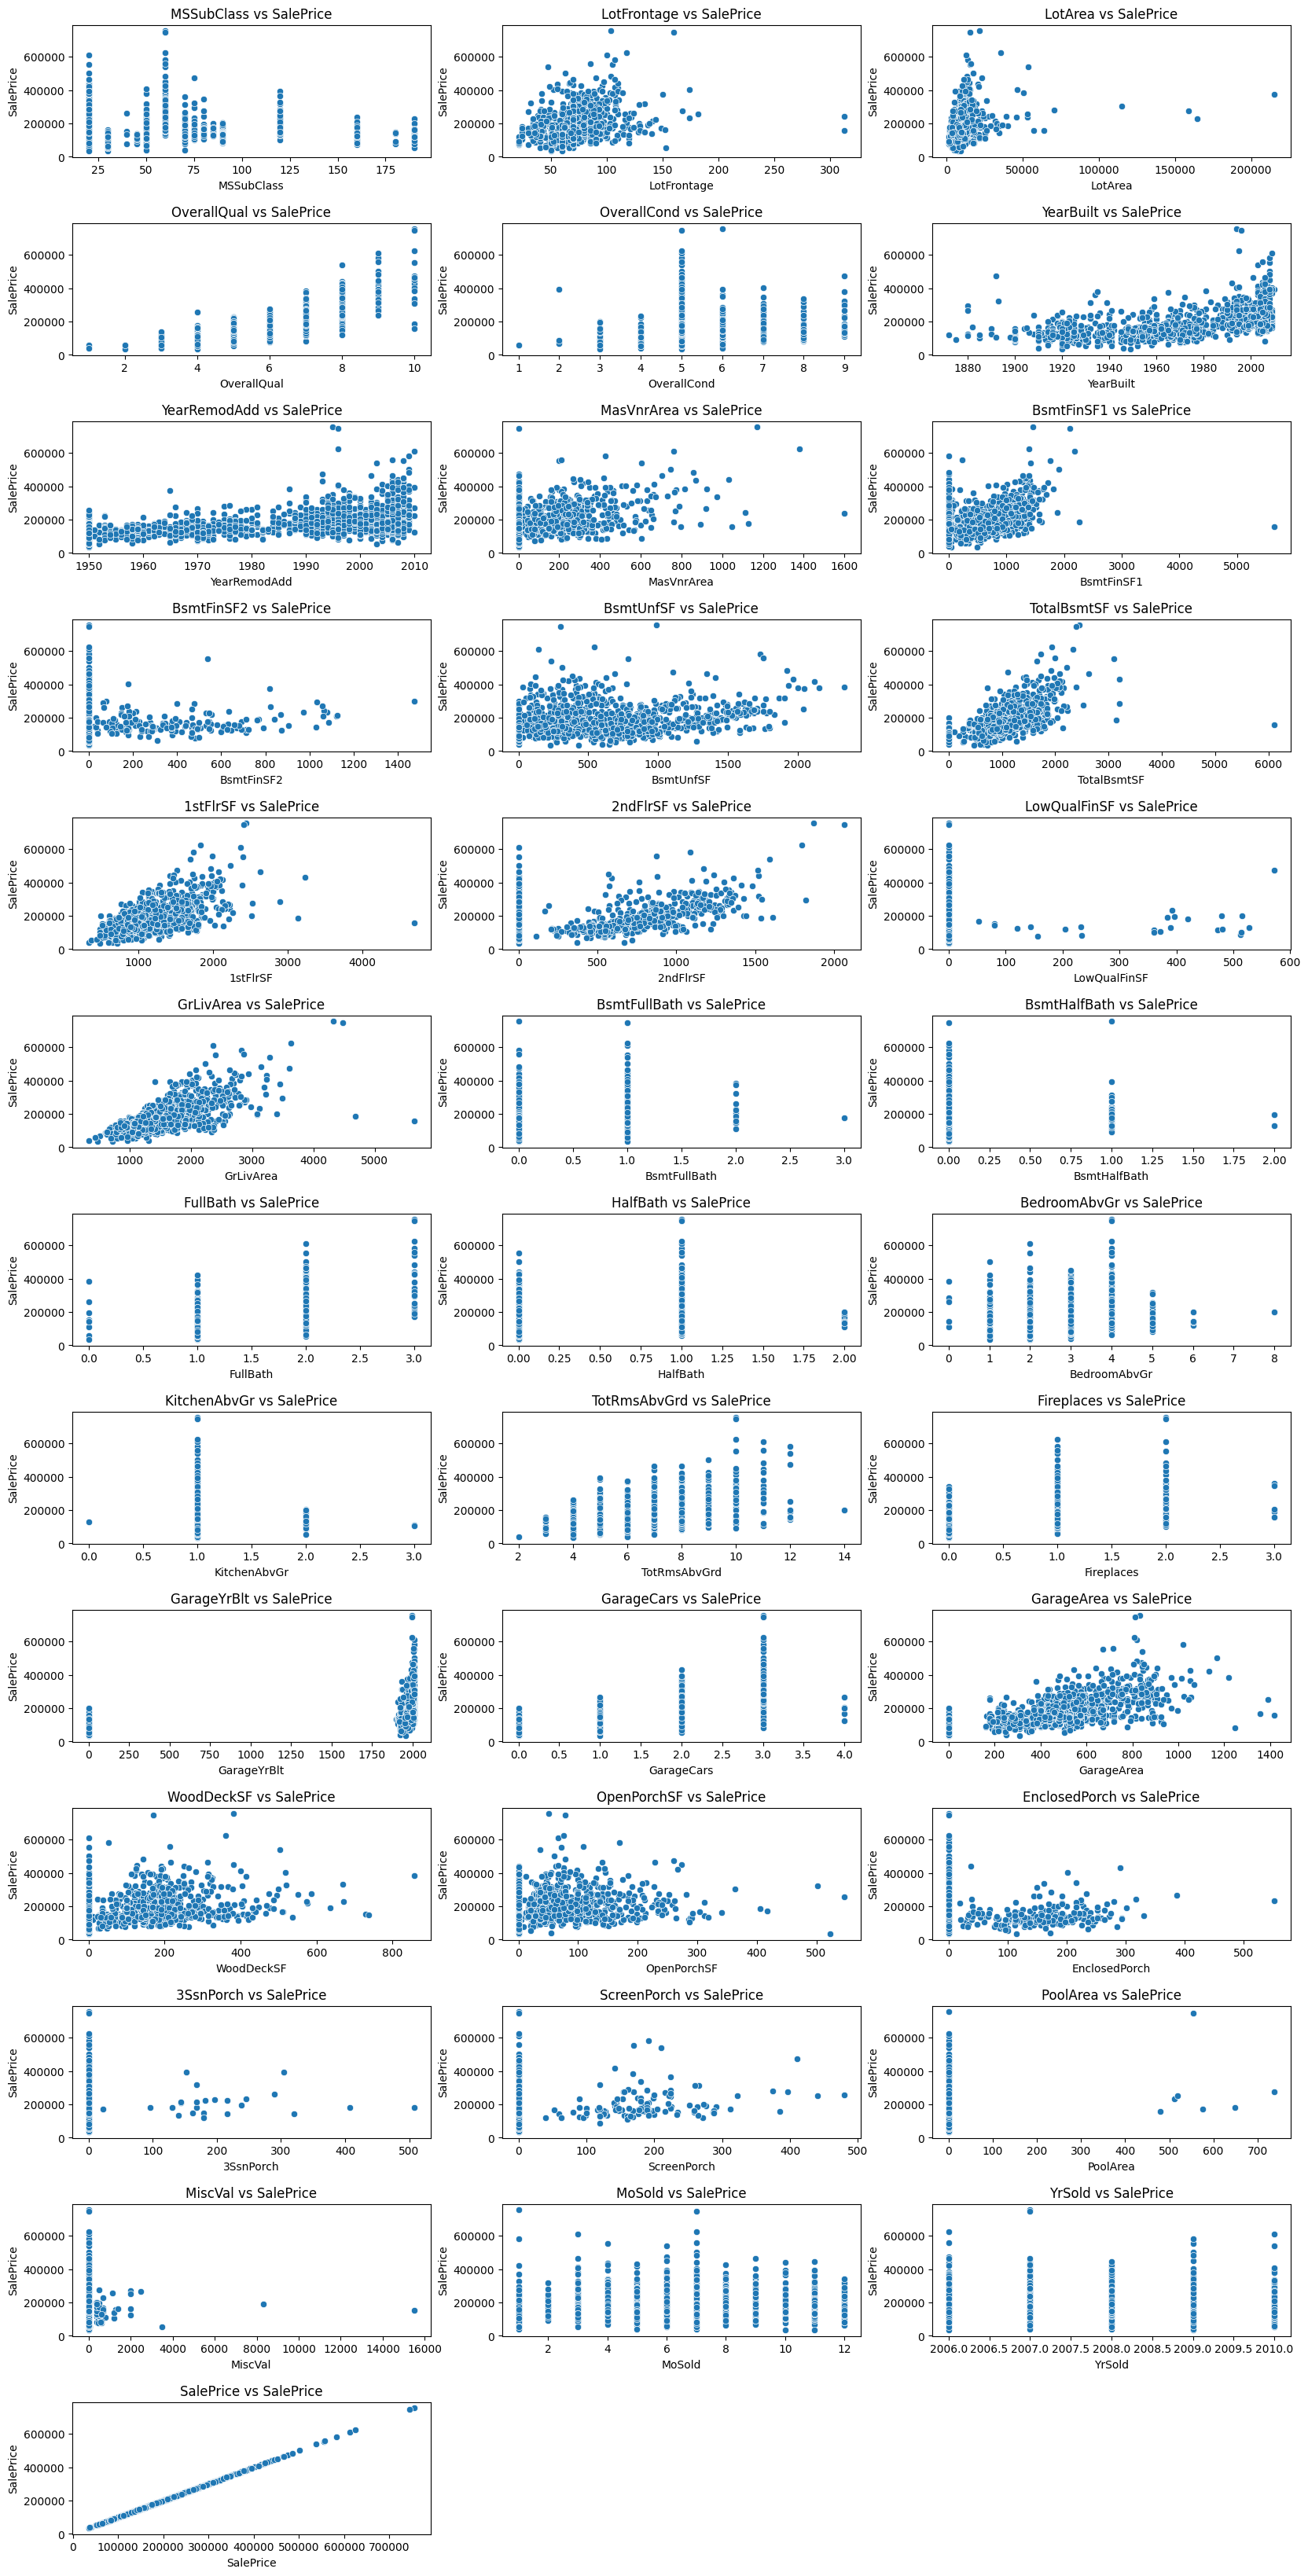

In [30]:
# Checking if linear relation exists between any of the variables and target variable
plt.figure(figsize=(20, 48))
for i, var in enumerate(cont_vars, start=1):
    plt.subplot(15,3,i)
    sns.scatterplot(data= housing, x=var, y='SalePrice')
    plt.title(var+ ' vs ' +'SalePrice')
    plt.subplots_adjust(hspace=0.5) 
plt.show()   

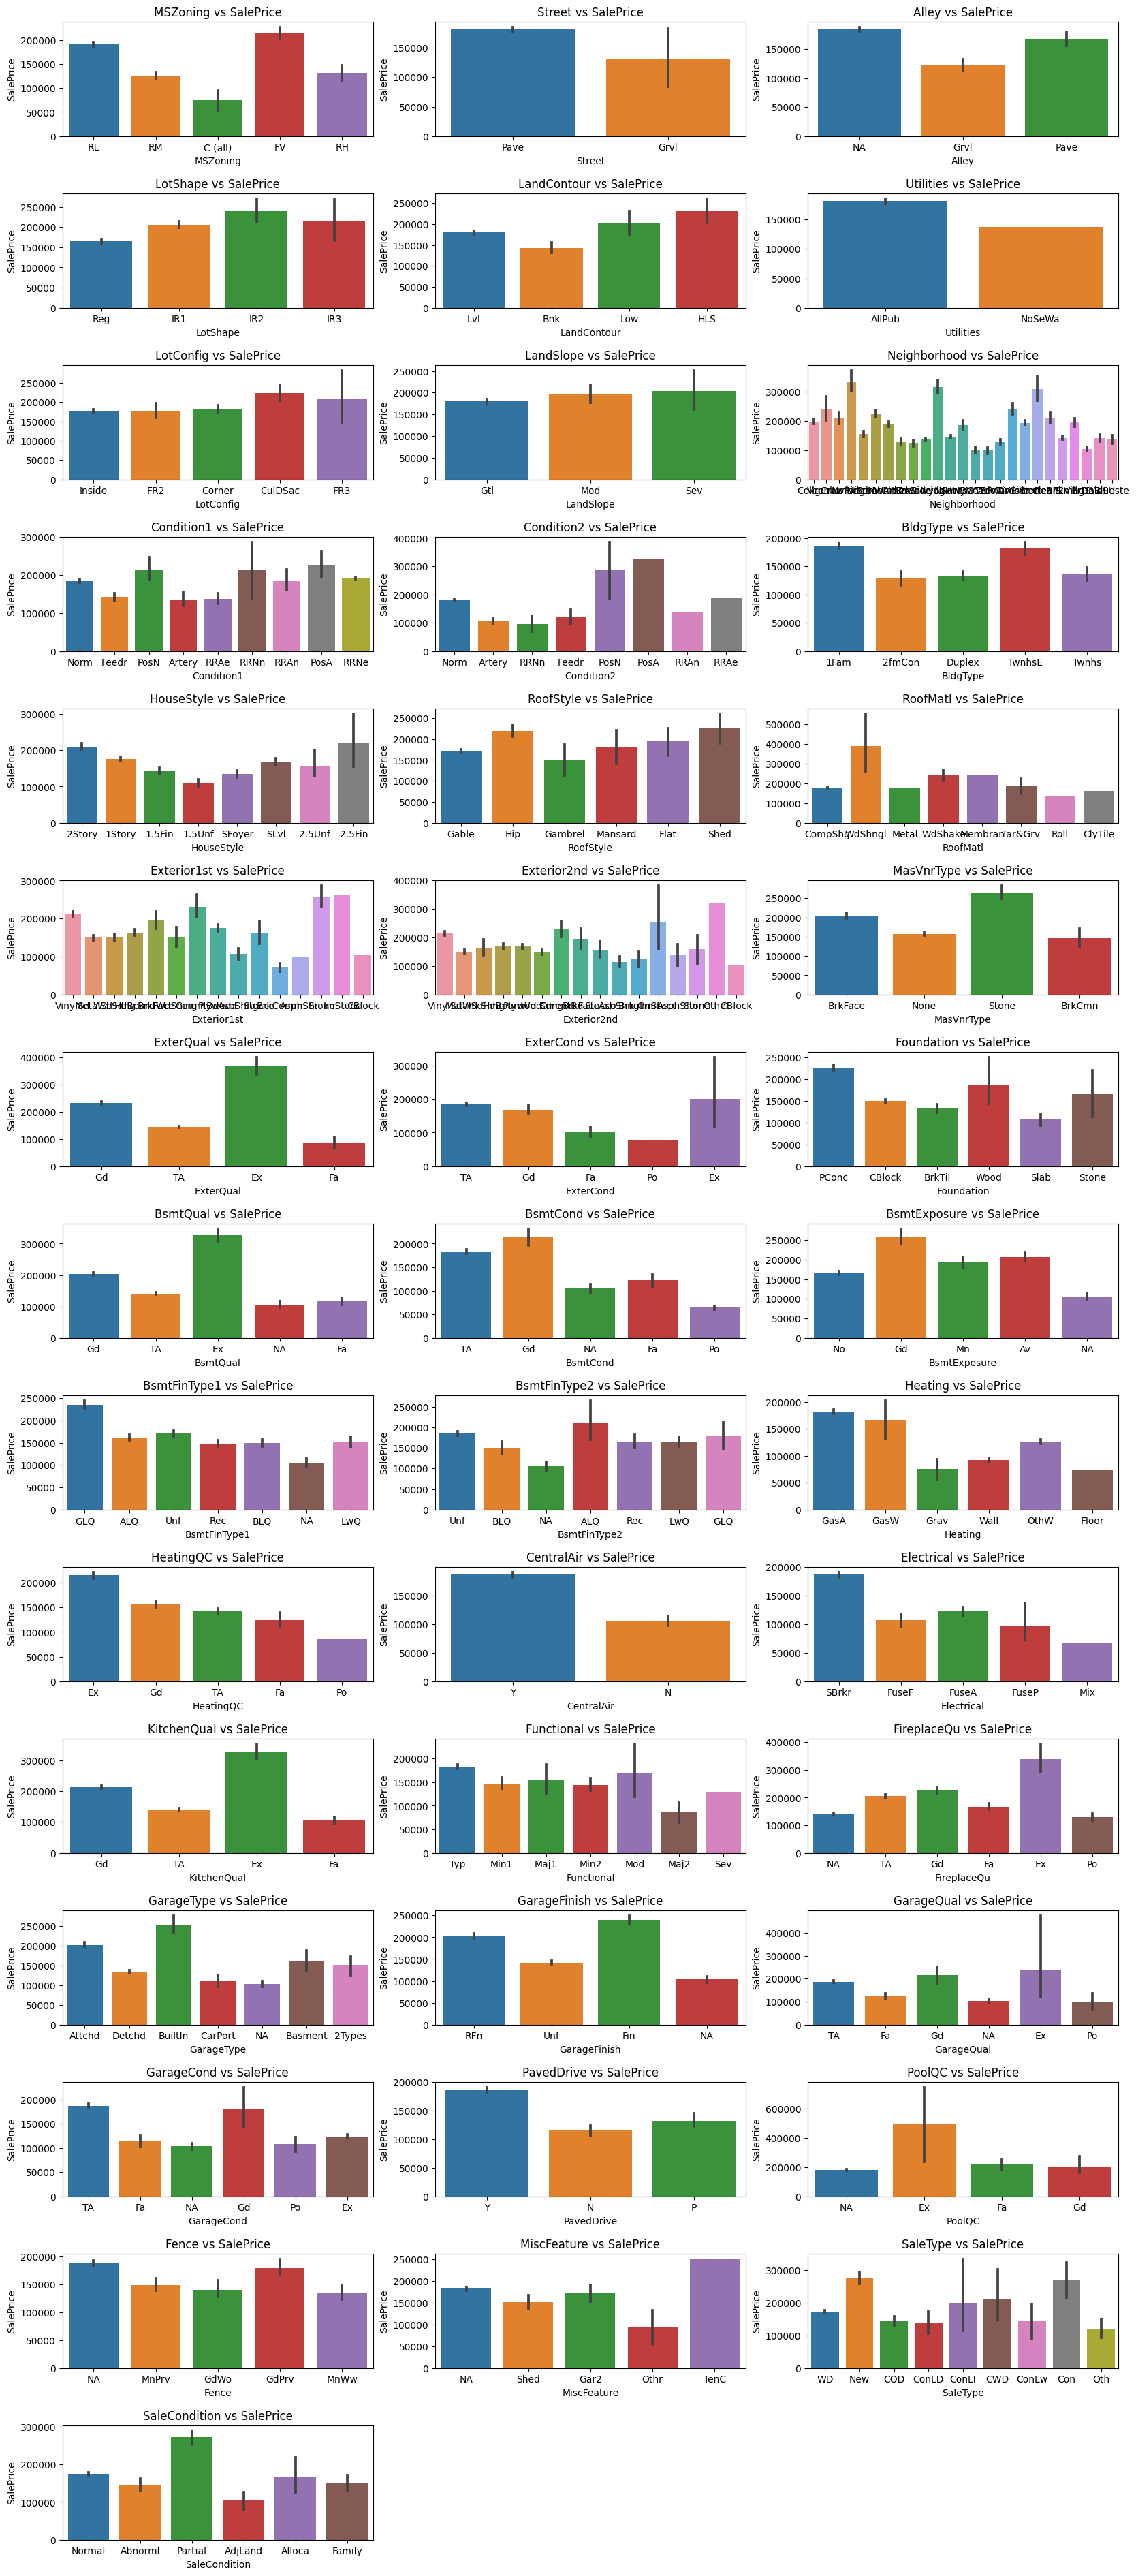

In [31]:
# Checking categorical variables against target variable
plt.figure(figsize=(20, 48))
for i, var in enumerate(cat_vars, start=1):
    plt.subplot(15,3,i)
    sns.barplot(data= housing, x=var, y='SalePrice')
    plt.title(var+ ' vs ' +'SalePrice')
    plt.subplots_adjust(hspace=0.5) 
plt.show()   

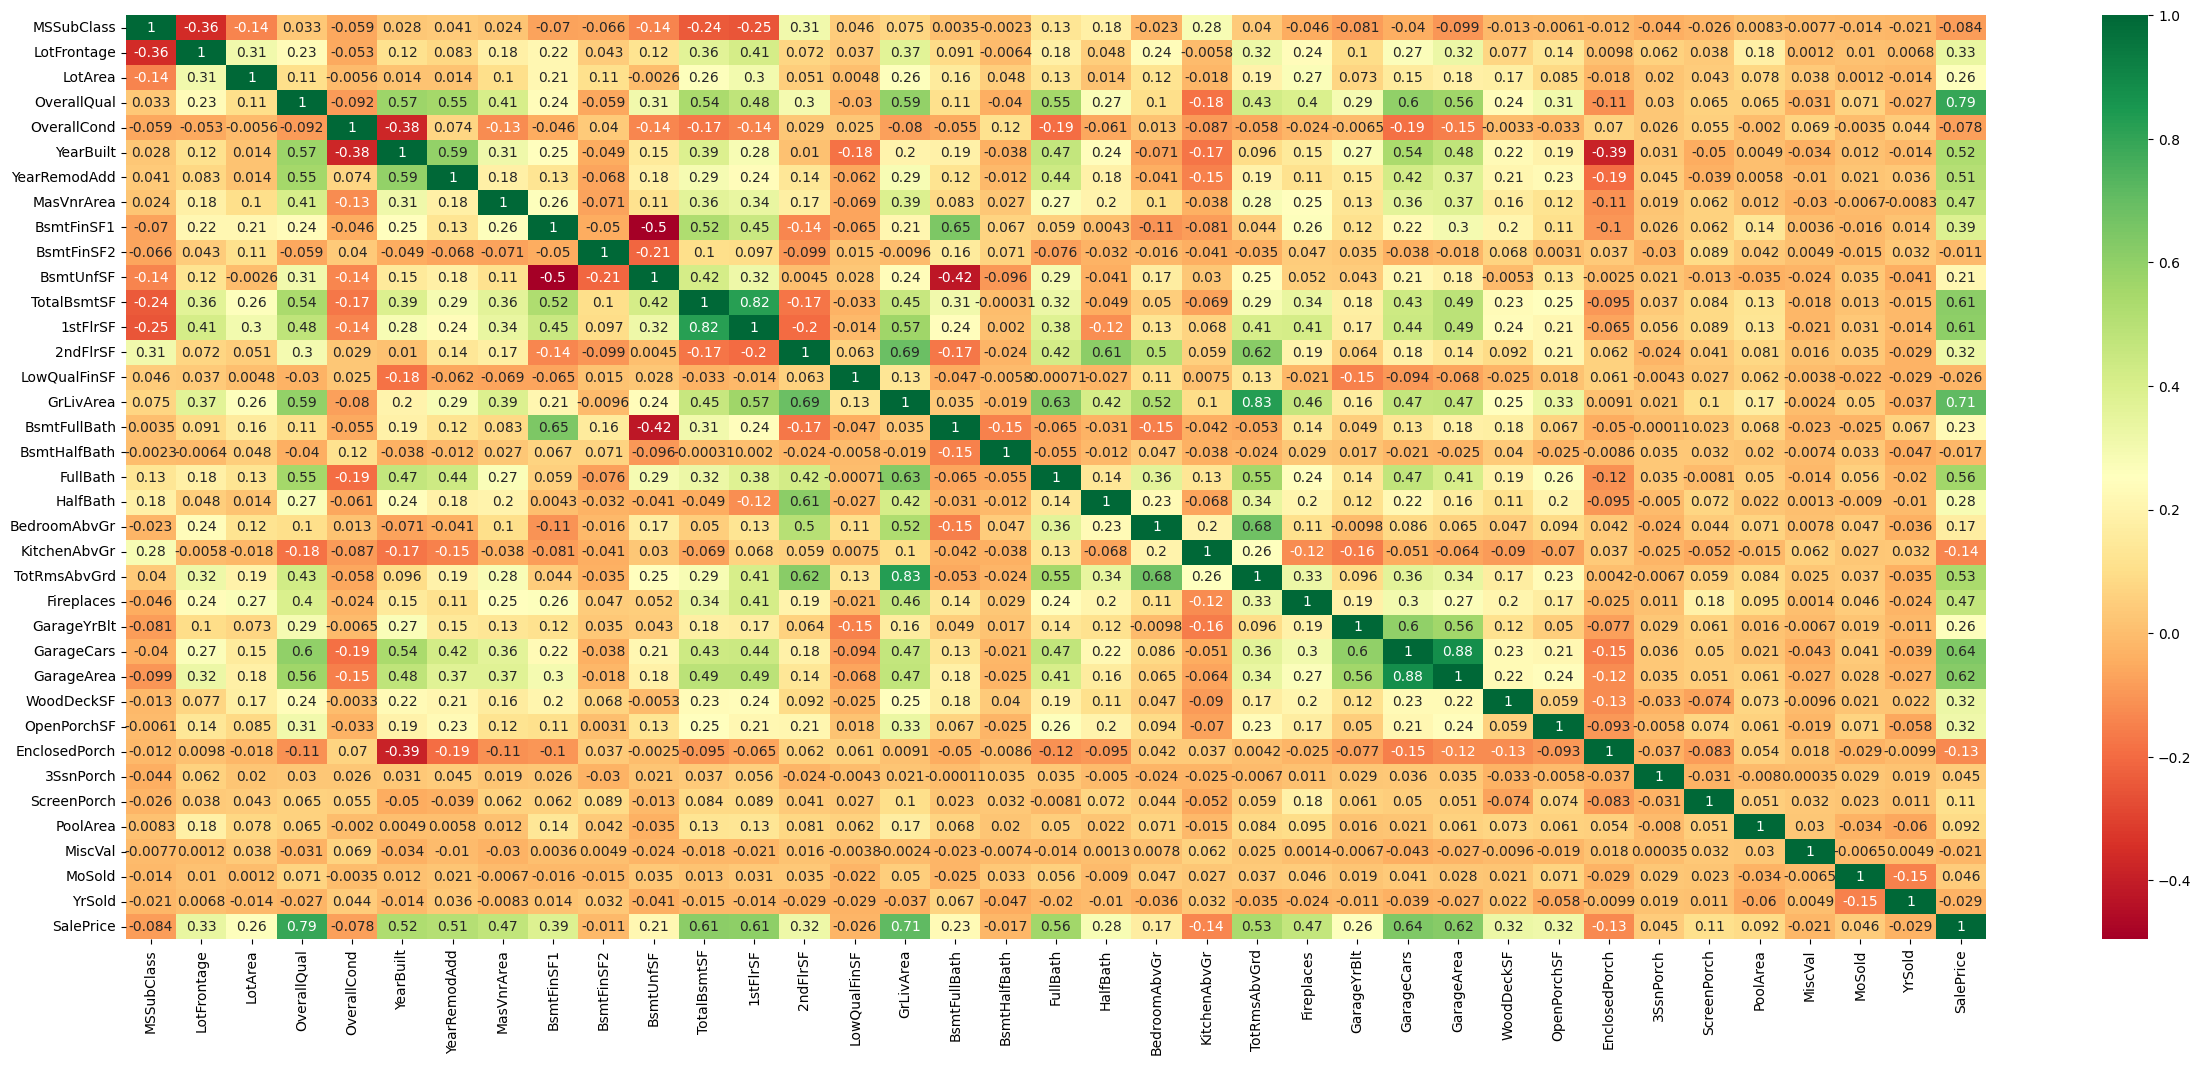

In [32]:
# Creating an heatmap of correlation
plt.figure(figsize=(30,12))
sns.heatmap(housing[cont_vars].corr(), cmap='RdYlGn', annot=True)
plt.show()

### Identifying outliers & fixing them

In [33]:
# Identifying continous columns to address outliers

outliers_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                    'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']

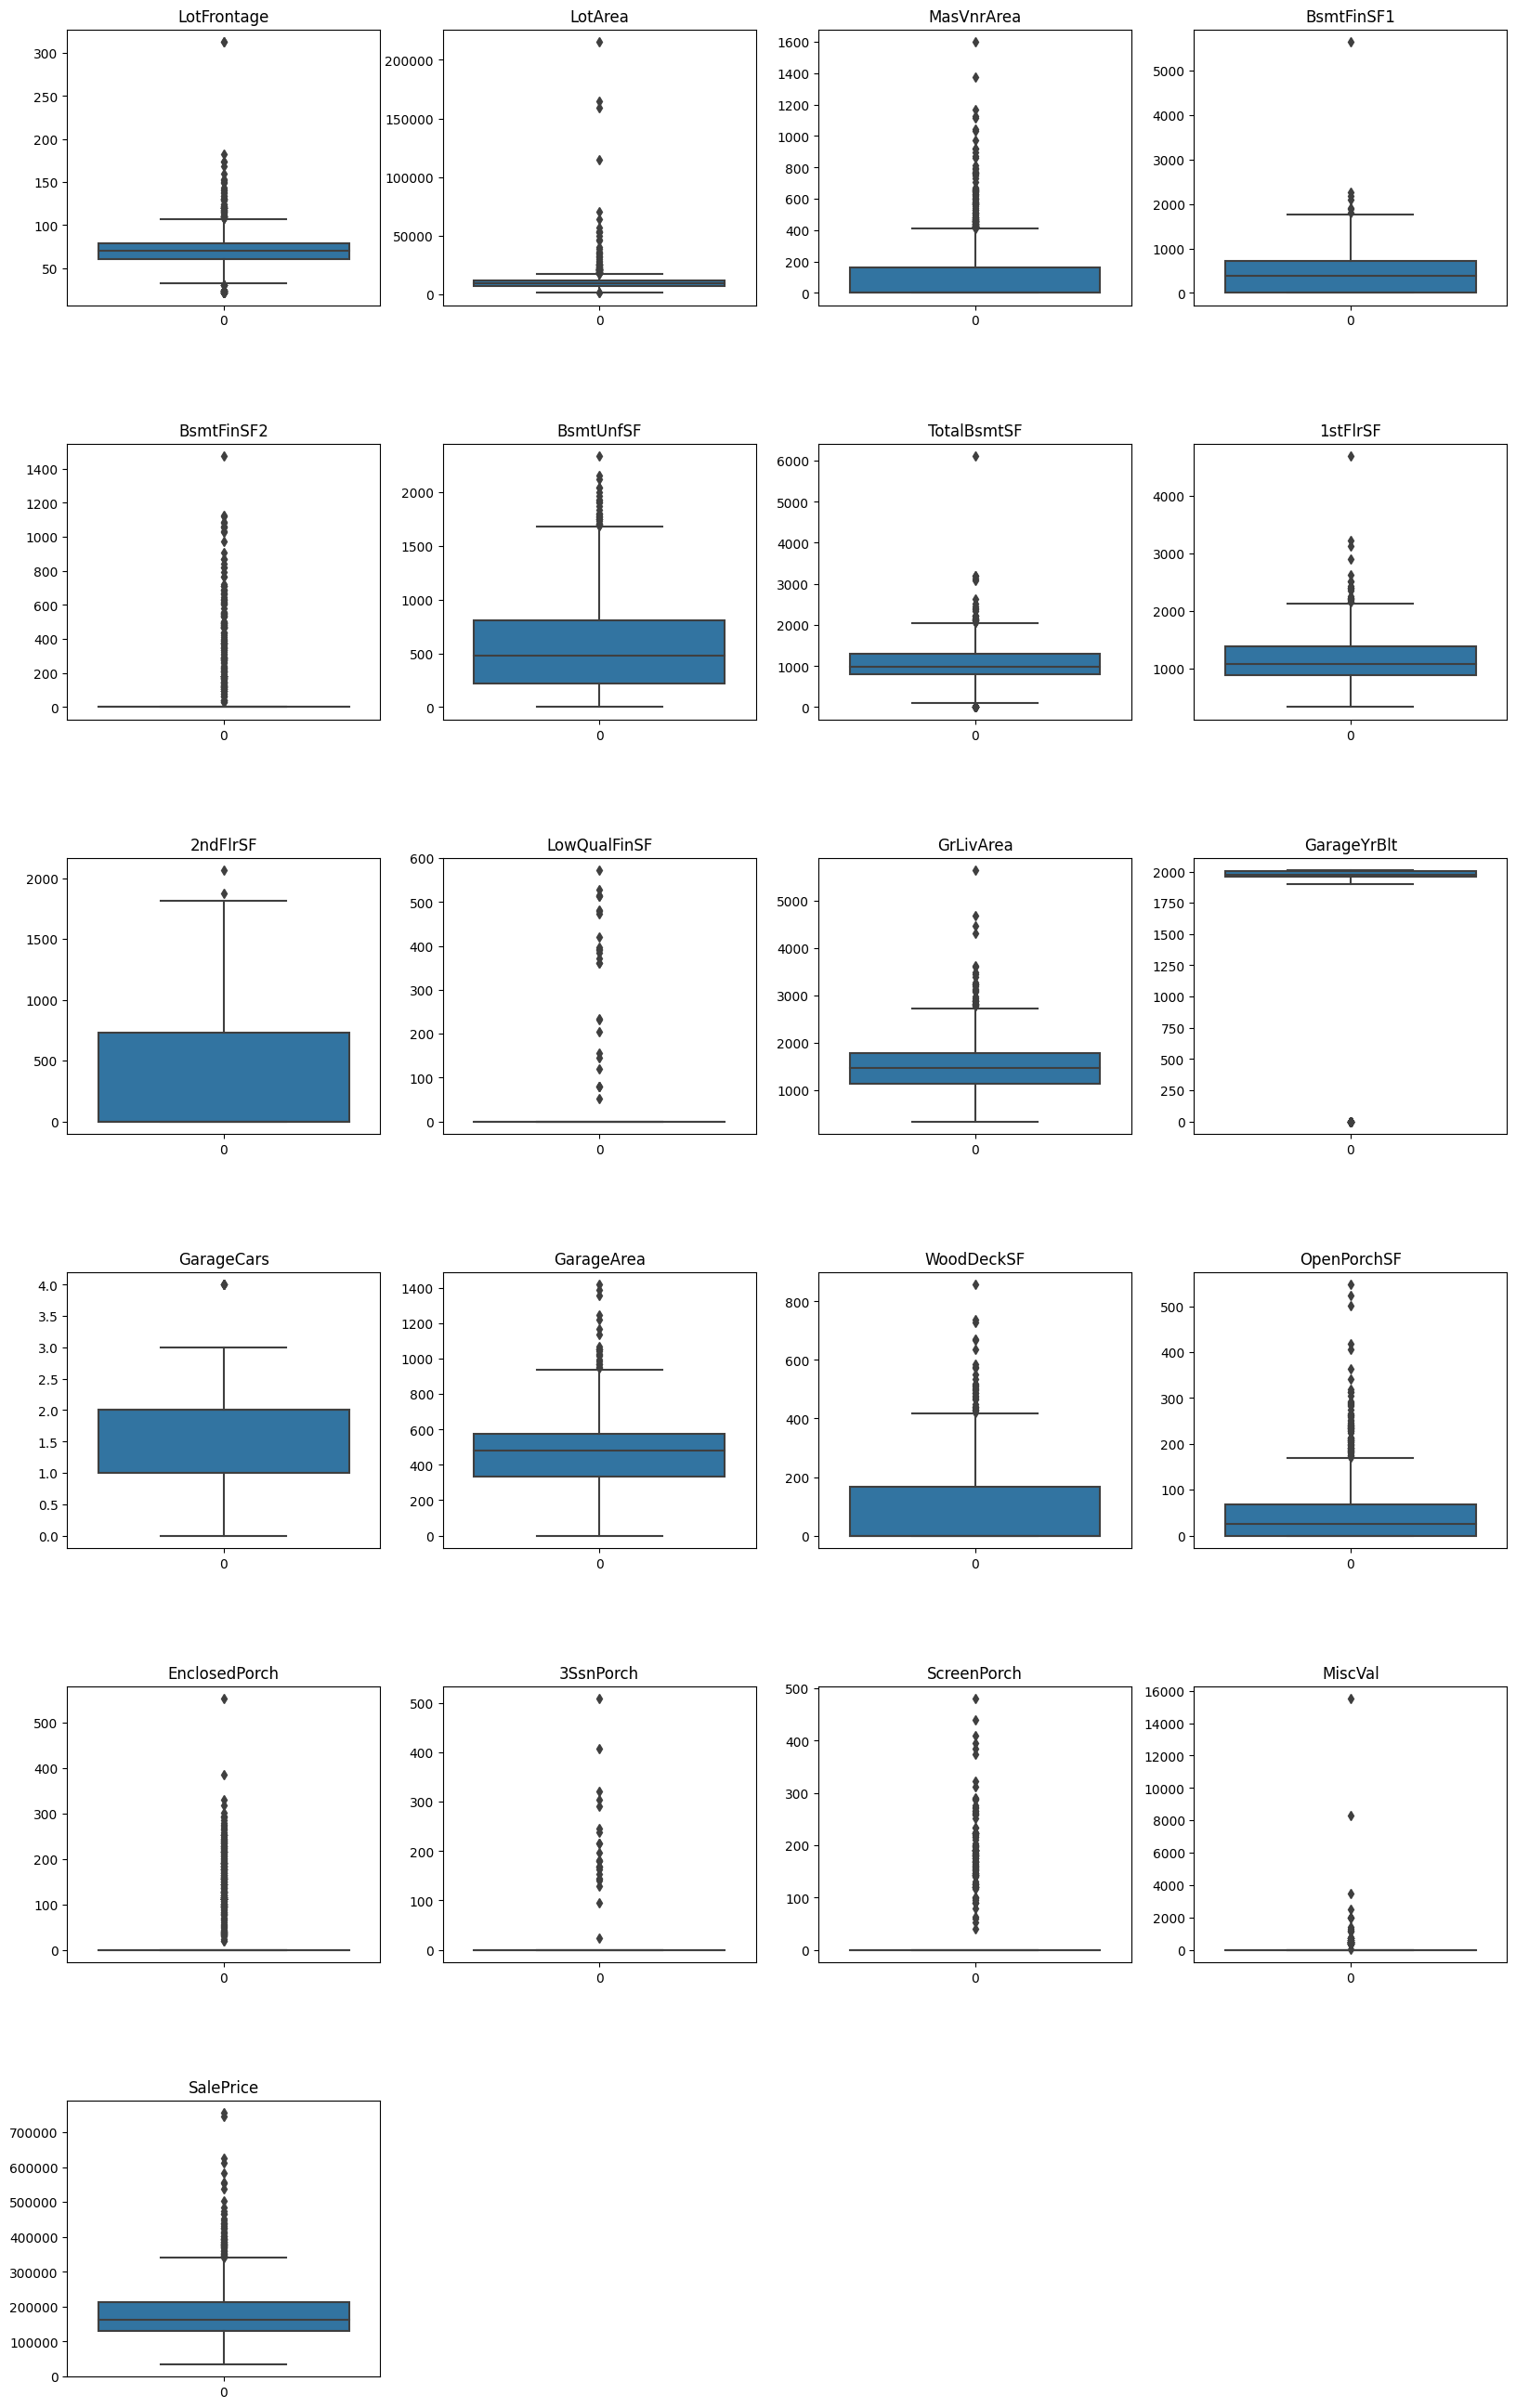

In [34]:
# Checking Outliers on categorical variable

plt.figure(figsize=(20, 56))
for i, var in enumerate(outliers_columns, start=1):
    plt.subplot(10,4,i)
    sns.boxplot(housing[var])
    plt.title(var)
    plt.subplots_adjust(hspace=0.5) 
plt.show()  

By looking at the above graphs it is observed that there are many variables that contains outliers. As outliers effect the performance of the model, we need to fix these outliers. 

We use Winsorization method to fix these outliers.

**Winsorization** is a data transformation technique used to handle outliers in a dataset. It involves limiting extreme values by replacing them with values closer to the rest of the data distribution. This technique helps mitigate the impact of outliers on statistical analyses and modeling.

In Winsorization, the extreme values are replaced with a specified percentile value or a certain number of standard deviations from the mean. The idea is to replace the extreme values with values that are still within a reasonable range but less extreme.

In [35]:
# Fixing extreme outliers on continous variable
from scipy.stats.mstats import winsorize

# Winsorization thresholds
lower_limit = 0.0125 
upper_limit = 0.0125

# Apply Winsorization on selected columns
housing[outliers_columns] = housing[outliers_columns].apply(lambda x: winsorize(x, limits=[lower_limit, upper_limit]))


We only tried to address the extreme values that are less than 1.25% and greater than 98.75%. If you observe the below graph, you can identify that most of the extreme values are replaced by their closet value.

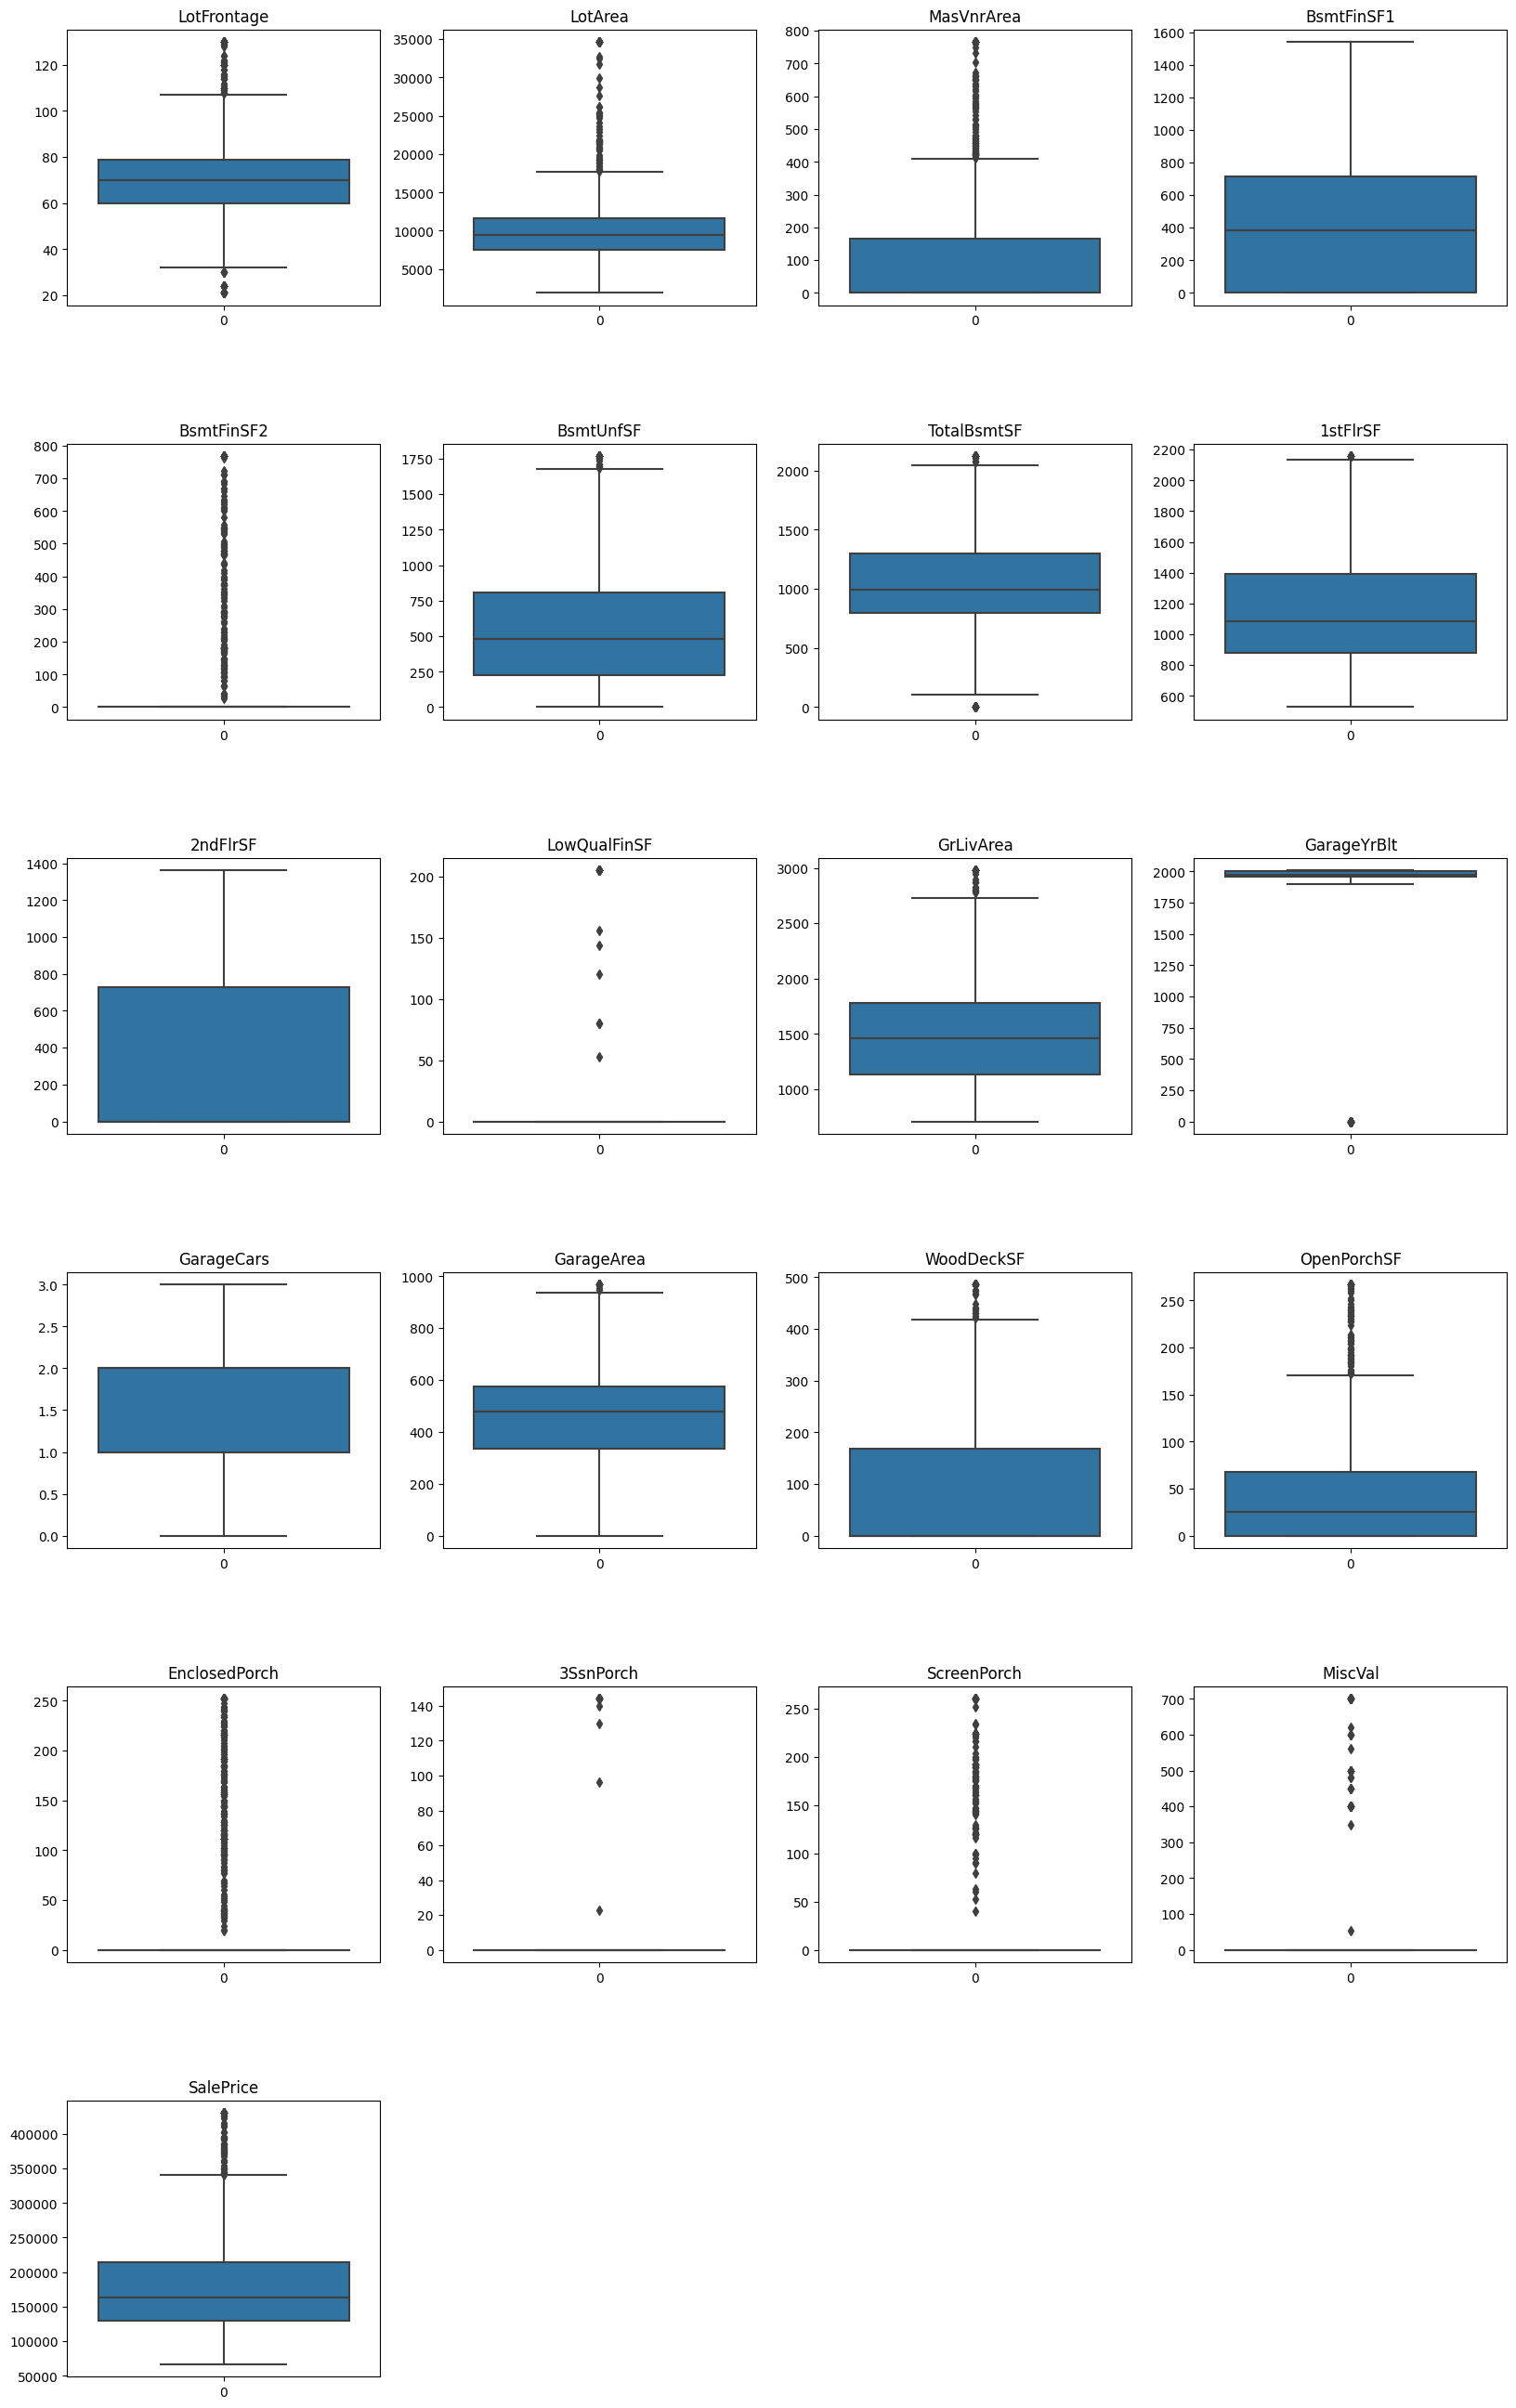

In [36]:
# Checking categorical variable after fixing extreme outliers

plt.figure(figsize=(20, 56))
for i, var in enumerate(outliers_columns, start=1):
    plt.subplot(10,4,i)
    sns.boxplot(housing[var])
    plt.title(var)
    plt.subplots_adjust(hspace=0.5) 
plt.show()  

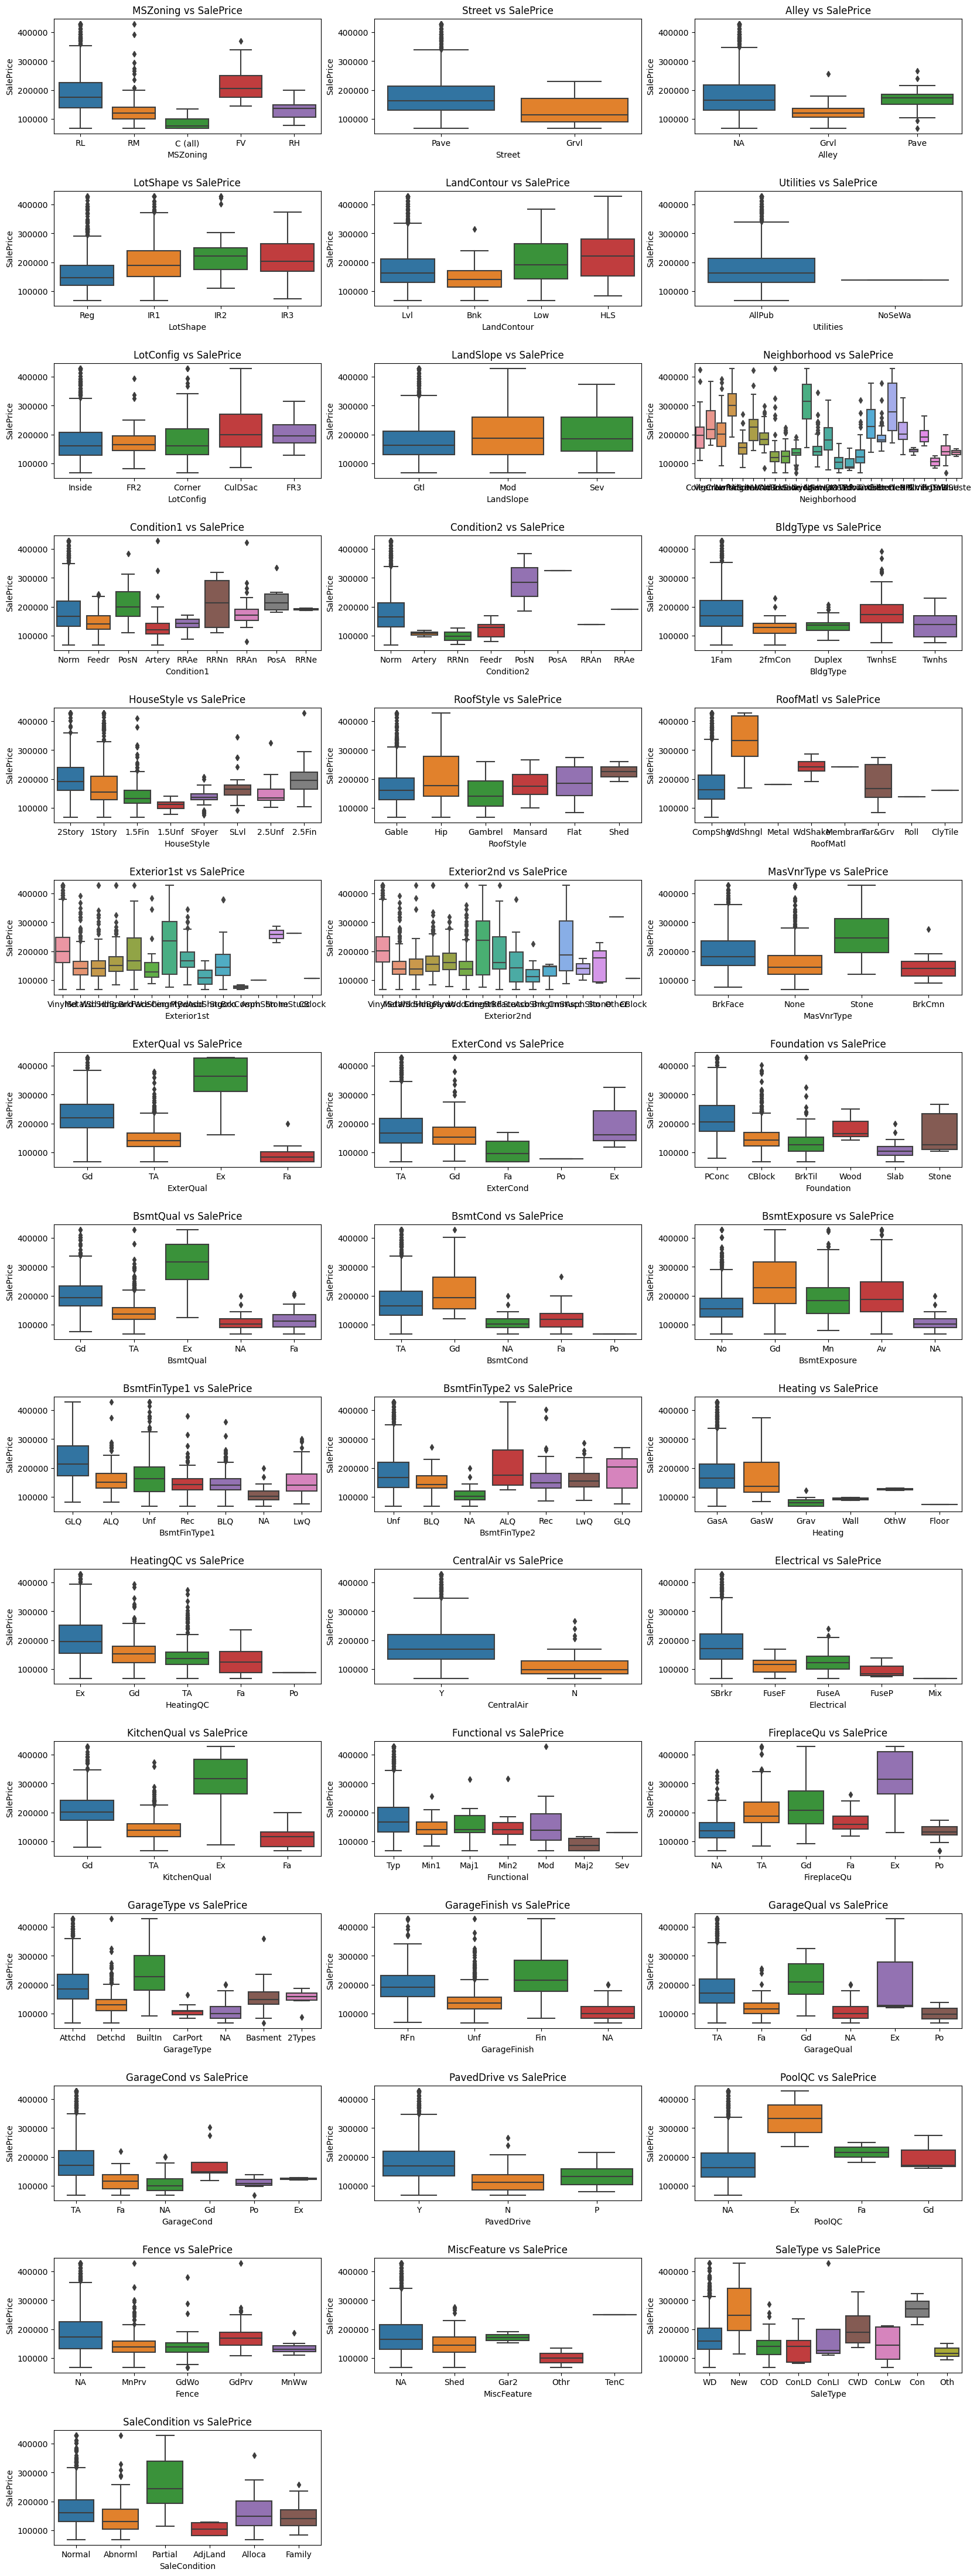

In [37]:
# Checking Outliers on categorical variable

plt.figure(figsize=(20, 56))
for i, var in enumerate(cat_vars, start=1):
    plt.subplot(15,3,i)
    sns.boxplot(data= housing, x=var, y='SalePrice')
    plt.title(var+ ' vs ' +'SalePrice')
    plt.subplots_adjust(hspace=0.5) 
plt.show()  

In [38]:
# columns_to_transform = ['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#                     'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [39]:
# # applying log transformation on the selected columns
# for column in columns_to_transform:
#     # Check if column has more than one unique value
#     housing[outliers_columns] = np.log(housing[outliers_columns] + 1)  # Add 1 to handle zero values

### Segmentation of varaibles & creating dummy variables

In [40]:
# Identifying variables those need to remain numerical, category and Ordinal
# and also identifying columns that need to be converted from Numeric to category and category to ordinal

num_to_cat = ['MSSubClass']
cat = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
       'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
      'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical',
      'Functional','GarageType','GarageFinish','PavedDrive','Fence','MiscFeature',
      'SaleType','SaleCondition']
num = ['LotFrontage', 'LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
      'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
      'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal',
      'MoSold', 'YrSold','SalePrice']
ordinal = ['OverallQual','OverallCond']
cat_to_ord = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual',
            'FireplaceQu','GarageQual','GarageCond','PoolQC']


In [41]:
# Converting ordinal variables to numeric

# Define the mapping dictionary
mapping = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}

# Convert ordinal categorical variable to numeric
for var in cat_to_ord:
    housing[var] = housing[var].map(mapping)

housing.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    NA      Reg   
1          20       RL         80.0     9600   Pave    NA      Reg   
2          60       RL         68.0    11250   Pave    NA      IR1   
3          70       RL         60.0     9550   Pave    NA      IR1   
4          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4             9        Typ   

   Firepla

In [42]:
# Converting ordinal variables to numeric

# Define the mapping dictionary
MSsubclass_mapping = {20: '1-ST 1946 & NEW', 30: '1-ST 1945 & OLD', 40: '1-ST W/FINIS', 45: '1-1/2 ST UNFIN', 50: '1-1/2 ST FINIS',
           60: '2-ST 1946 & NEW', 70: '2-ST 1945 & OLD', 75: '2-1/2 ST', 80: 'SPLIT/MLEVEL', 85: 'SPLIT FOYER', 90: 'DUPLEX',
           120: '1-ST 1946 & New', 150: '1-1/2 ST PUD', 160: '2-ST 1946 & NEW', 180: 'PUD MLEVEL', 190: '2-FAM CONV'}

# Convert ordinal categorical variable to numeric
housing['MSSubClass'] = housing['MSSubClass'].map(MSsubclass_mapping)

housing.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  2-ST 1946 & NEW       RL         65.0     8450   Pave    NA      Reg   
1  1-ST 1946 & NEW       RL         80.0     9600   Pave    NA      Reg   
2  2-ST 1946 & NEW       RL         68.0    11250   Pave    NA      IR1   
3  2-ST 1945 & OLD       RL         60.0     9550   Pave    NA      IR1   
4  2-ST 1946 & NEW       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4             9 

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [44]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [45]:
cont_vars = housing.select_dtypes(include=['int32','int64','float32','float64']).columns
cont_vars

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [46]:
cat_vars = housing.select_dtypes(exclude=['int32','int64','float32','float64']).columns
cat_vars

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
len(cont_vars)+len(cat_vars)

80

In [48]:
dummy_categories = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
binary_categories = ['Street', 'CentralAir']

In [49]:
# Creating dummy variable for categorical & binary variables and droping the main original column
# If NA is present in the variable, we will drop NA instead of First Column.
for var in dummy_categories:
    dummy_var = 'dummy_' + str(var)
    temp_dummy = housing[var].unique()
    if 'NA' in temp_dummy:
        dummy_var = pd.get_dummies(housing[var], dtype=int, prefix=var)
        dummy_var_name = str(var)+'_'+'NA'
        dummy_var = dummy_var.drop(dummy_var_name, axis=1)
    else:
         dummy_var = pd.get_dummies(housing[var], drop_first=True, dtype=int, prefix=var)
    housing = pd.concat([housing,dummy_var], axis=1)
    housing = housing.drop(var, axis=1)
housing

LotFrontage  LotArea Street  OverallQual  OverallCond  YearBuilt  \
0            65.0     8450   Pave            7            5       2003   
1            80.0     9600   Pave            6            8       1976   
2            68.0    11250   Pave            7            5       2001   
3            60.0     9550   Pave            7            5       1915   
4            84.0    14260   Pave            8            5       2000   
...           ...      ...    ...          ...          ...        ...   
1455         62.0     7917   Pave            6            5       1999   
1456         85.0    13175   Pave            6            6       1978   
1457         66.0     9042   Pave            7            9       1941   
1458         68.0     9717   Pave            5            6       1950   
1459         75.0     9937   Pave            5            6       1965   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             2003       196.0          4          3         4         3   
1             1976         0.0          3          3         4         3   
2             2002       162.0          4          3         4         3   
3             1970         0.0          3          3         3         4   
4             2000       350.0          4          3         4         3   
...            ...         ...        ...        ...       ...       ...   
1455          2000         0.0          3          3         4         3   
1456          1988       119.0          3          3         4         3   
1457          2006         0.0          5          4         3         4   
1458          1996         0.0          3          3         3         3   
1459          1965         0.0          4          3         3         3   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC CentralAir  \
0            706           0        150          856          5          Y   
1            978           0        284         1262          5          Y   
2            486           0        434          920          5          Y   
3            216           0        540          756          4          Y   
4            655           0        490         1145          5          Y   
...          ...         ...        ...          ...        ...        ...   
1455           0           0        953          953          5          Y   
1456         790         163        589         1542          3          Y   
1457         275           0        877         1152          5          Y   
1458          49         768          0         1078          4          Y   
1459         830         290        136         1256          4          Y   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0       1717             1             0   
4         1145      1053             0       2198             1             0   
...        ...       ...           ...        ...           ...           ...   
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0            2         1             3             1            4   
1            2         0             3             1            3   
2            2         1             3             1            4   
3            1    

In [50]:
# Encoding Street variable

# Define the mapping dictionary
mapping = {'Grvl': 0, 'Pave':1}

# Convert ordinal categorical variable to numeric
housing['Street'] = housing['Street'].map(mapping)

housing.head(5)

LotFrontage  LotArea  Street  OverallQual  OverallCond  YearBuilt  \
0         65.0     8450       1            7            5       2003   
1         80.0     9600       1            6            8       1976   
2         68.0    11250       1            7            5       2001   
3         60.0     9550       1            7            5       1915   
4         84.0    14260       1            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          4          3         4         3   
1          1976         0.0          3          3         4         3   
2          2002       162.0          4          3         4         3   
3          1970         0.0          3          3         3         4   
4          2000       350.0          4          3         4         3   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC CentralAir  \
0         706           0        150          856          5          Y   
1         978           0        284         1262          5          Y   
2         486           0        434          920          5          Y   
3         216           0        540          756          4          Y   
4         655           0        490         1145          5          Y   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             8   
1         2         0             3             1            3             6   
2         2         1             3             1            4             6   
3         1         0             3             1            4             7   
4         2         1             4             1            4             9   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0           0            0       2003.0           2         548           3   
1           1            3       1976.0           2         460           3   
2           1            3       2001.0           2         608           3   
3           1            4       1998.0           3         642           3   
4           1            3       2000.0           3         836           3   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           3           0           61              0          0            0   
1           3         298            0              0          0            0   
2           3           0           42              0          0            0   
3           3           0           35            252          0            0   
4           3         192           84              0          0            0   

   PoolArea  PoolQC  MiscVal  MoSold  YrSold  SalePrice  \
0         0       0        0       2    2008     208500   
1         0       0        0       5    2007     181500   
2         0       0        0       9    2008     223500   
3         0       0        0       2    2006     140000   
4         0       0        0      12    2008     250000   

   MSSubClass_1-1/2 ST UNFIN  MSSubClass_1-ST 1945 & OLD  ...  \
0                          0                           0  ...   
1                          0                           0  ...   
2                          0                           0  ...   
3                          0                           0  ...   
4                          0                           0  ...   

   BsmtFinType2_LwQ  B

In [51]:
# Encoding CentralAir variable

# Define the mapping dictionary
mapping = {'N': 0, 'Y':1}

# Convert ordinal categorical variable to numeric
housing['CentralAir'] = housing['CentralAir'].map(mapping)

housing.head(5)

LotFrontage  LotArea  Street  OverallQual  OverallCond  YearBuilt  \
0         65.0     8450       1            7            5       2003   
1         80.0     9600       1            6            8       1976   
2         68.0    11250       1            7            5       2001   
3         60.0     9550       1            7            5       1915   
4         84.0    14260       1            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          4          3         4         3   
1          1976         0.0          3          3         4         3   
2          2002       162.0          4          3         4         3   
3          1970         0.0          3          3         3         4   
4          2000       350.0          4          3         4         3   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0         706           0        150          856          5           1   
1         978           0        284         1262          5           1   
2         486           0        434          920          5           1   
3         216           0        540          756          4           1   
4         655           0        490         1145          5           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             8   
1         2         0             3             1            3             6   
2         2         1             3             1            4             6   
3         1         0             3             1            4             7   
4         2         1             4             1            4             9   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0           0            0       2003.0           2         548           3   
1           1            3       1976.0           2         460           3   
2           1            3       2001.0           2         608           3   
3           1            4       1998.0           3         642           3   
4           1            3       2000.0           3         836           3   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           3           0           61              0          0            0   
1           3         298            0              0          0            0   
2           3           0           42              0          0            0   
3           3           0           35            252          0            0   
4           3         192           84              0          0            0   

   PoolArea  PoolQC  MiscVal  MoSold  YrSold  SalePrice  \
0         0       0        0       2    2008     208500   
1         0       0        0       5    2007     181500   
2         0       0        0       9    2008     223500   
3         0       0        0       2    2006     140000   
4         0       0        0      12    2008     250000   

   MSSubClass_1-1/2 ST UNFIN  MSSubClass_1-ST 1945 & OLD  ...  \
0                          0                           0  ...   
1                          0                           0  ...   
2                          0                           0  ...   
3                          0                           0  ...   
4                          0                           0  ...   

   BsmtFinType2_

In [52]:
housing.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 242 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    LotFrontage                 1460 non-null   float64
 1    LotArea                     1460 non-null   int64  
 2    Street                      1460 non-null   int64  
 3    OverallQual                 1460 non-null   int64  
 4    OverallCond                 1460 non-null   int64  
 5    YearBuilt                   1460 non-null   int64  
 6    YearRemodAdd                1460 non-null   int64  
 7    MasVnrArea                  1460 non-null   float64
 8    ExterQual                   1460 non-null   int64  
 9    ExterCond                   1460 non-null   int64  
 10   BsmtQual                    1460 non-null   int64  
 11   BsmtCond                    1460 non-null   int64  
 12   BsmtFinSF1                  1460 non-null   int64  
 13   BsmtFinSF2      

## Model Building

### Splitting Train - Test set

In [53]:
housing_final = housing.copy()

In [54]:
y = housing_final.pop('SalePrice')
X = housing_final

In [55]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
# Creating numerical variables
num_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
            'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 
            'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold']

In [57]:
housing[num_vars]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  \
0          196.0          4          3         4         3         706   
1            0.0          3          3         4         3         978   
2          162.0          4          3         4         3         486   
3            0.0          3          3         3         4         216   
4          350.0          4          3         4         3         655   
...          ...        ...        ...       ...       ...         ...   
1455         0.0          3          3         4         3           0   
1456       119.0          3          3         4         3         790   
1457         0.0          5          4         3         4         275   
1458         0.0          3          3         3         3          49   
1459         0.0          4          3         3         3         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0              0        150          856          5       856       854   
1              0        284         1262          5      1262         0   
2              0        434          920          5       920       866   
3              0        540          756          4       961       756   
4              0        490         1145          5      1145      1053   
...          ...        ...          ...        ...       ...       ...   
1455           0        953          953          5       953       694   
1456         163        589         1542          3      2073         0   
1457           0        877         1152          5      1188      1152   
1458         768          0         1078          4      1078         0   
1459         290        136         1256          4      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0                3             1            4             8           0   
1                3             1            3             6           1   
2                3             1            4

### Scaling the data

In [58]:
# Scaling the numerical variables
scaler = MinMaxScaler()
#scaler = StandardScaler()

# Fit and Transform on X_train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Apply Transform on X_test
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [59]:
X_train.describe()

LotFrontage      LotArea       Street  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.442531     0.246885     0.996082     0.565676     0.572723   
std       0.179947     0.147184     0.062500     0.155529     0.136506   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.357798     0.169597     1.000000     0.444444     0.500000   
50%       0.450000     0.232295     1.000000     0.555556     0.500000   
75%       0.522936     0.293712     1.000000     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea    ExterQual    ExterCond  \
count  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.719215      0.582305     0.131598     0.466210     0.363696   
std       0.219897      0.343843     0.220404     0.190389     0.116470   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.594203      0.283333     0.000000     0.333333     0.333333   
50%       0.731884      0.733333     0.000000     0.333333     0.333333   
75%       0.927536      0.900000     0.206266     0.666667     0.333333   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

          BsmtQual     BsmtCond   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.695788     0.732125     0.286383     0.060767     0.317554   
std       0.180065     0.144291     0.278328     0.197771     0.249479   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600000     0.750000     0.000000     0.000000     0.122172   
50%       0.800000     0.750000     0.254545     0.000000     0.261312   
75%       0.800000     0.750000     0.462338     0.000000     0.455882   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalBsmtSF    HeatingQC   CentralAir     1stFlrSF     2ndFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.496099     0.787218     0.927522     0.389747     0.249306   
std       0.194486     0.243717     0.259405     0.224768     0.313066   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.373880     0.500000     1.000000     0.213848     0.000000   
50%       0.467704     1.000000     1.000000     0.343137     0.000000   
75%       0.619519     1.000000     1.000000     0.549020     0.533774   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   
mean       0.016545     0.352451      0.146588      0.029873     0.522037   
std        0.122541     0.214388      0.175127      0.120615     0.183997   
min        0.000000     0.000000      0.000000      0.000000     0.000000   
25%        0.000000     0.187665      0.000000      0.000000     0.333333   
50%        0.000000     0.333921      0.000000      0.000000     0.666667   
75%        0.000000     0.466960      0.333333      0.000000     0.666667   
max        1.000000     1.000000      1.000000      1.000000     1.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
count  1021.000000   1021.000000   1021.000000  1021.000000   1021.000000   
mean      0.188051      0.356881      0.026934     0.503754      0.318315   
std       0.250283      0.102552      0.115084     0.219705      0.145956   
min       0.000000      0.000000      0.000000     0.000000      0.000000   
25%       0.000000      0.250000      0.000000     0.333333      0.181818   
50%       0.000000      0.375000      0.000000     0.333333      0.272727   
75%       0.500000      0.375000      0.000000     0.666667      0.363636   
max       1.000000  

### Linear Regression

In [60]:
# Building model using Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression

# Initialize LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predicting y_train_pred
y_train_pred_lr = lr.predict(X_train)

In [62]:
# Find the value of r squared
r2_score(y_train, y_train_pred_lr)

0.9426452266004857

In [63]:
# Calculating residuals
residuals_lr_train = y_train - y_train_pred_lr

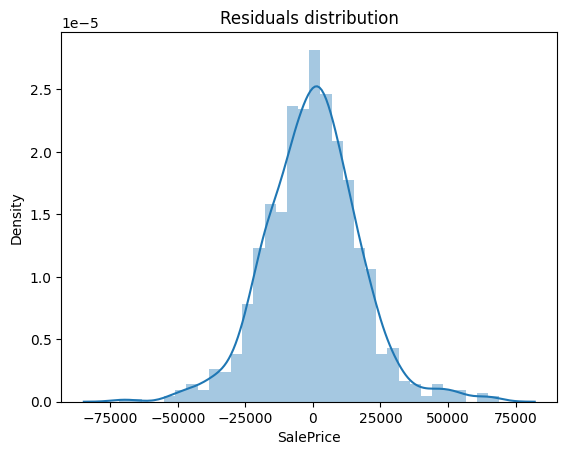

In [64]:
# Visualizing residual distribution
fig = plt.figure()
sns.distplot(residuals_lr_train, kde=True)
plt.title("Residuals distribution")
plt.show()

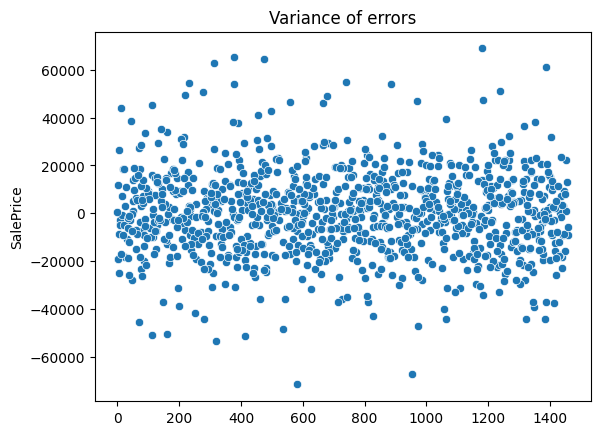

In [65]:
# Visualizing Homoscedasticity of errors
fig = plt.figure()
sns.scatterplot(residuals_lr_train)
plt.title("Variance of errors")
plt.show()

In [66]:
# Making prediction on test dataset
y_test_pred_lr = lr.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_test_pred_lr)
r_squared = r2_score(y_test, y_test_pred_lr)
print('r_square_value :',r_squared)
print('Mean_Squared_Error :' ,mse)

r_square_value : -2.7291432399412035e+22
Mean_Squared_Error : 1.5008371559593403e+32


## Data Transformation

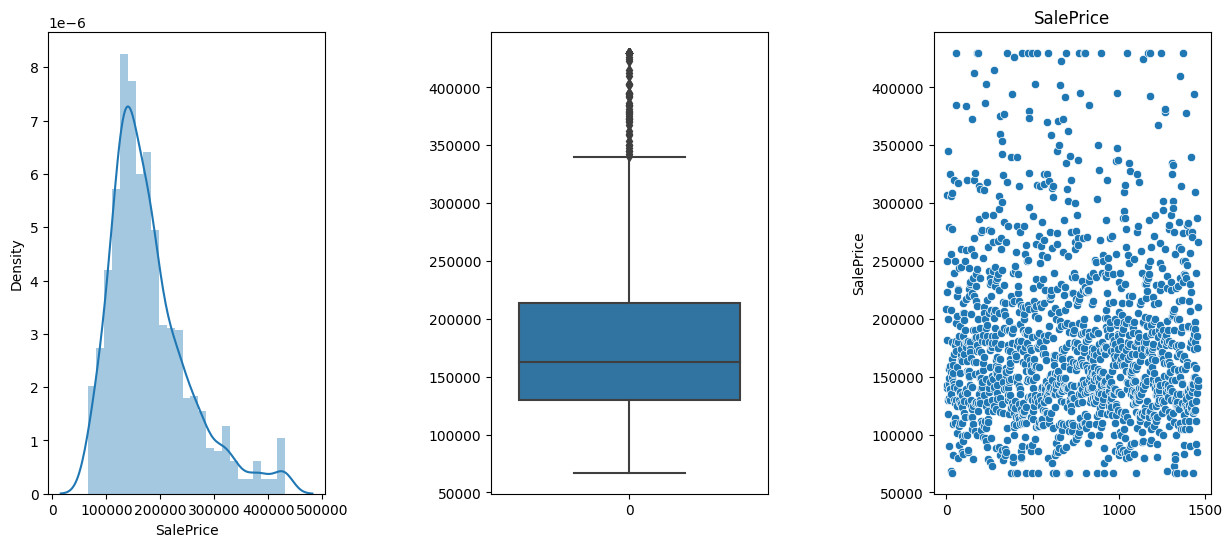

In [68]:
# Visualizing Target varaible

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.distplot(housing['SalePrice'])

plt.subplot(1,3,2)
sns.boxplot(housing['SalePrice'])

plt.subplot(1,3,3)
sns.scatterplot(housing['SalePrice'])

plt.subplots_adjust(wspace=0.6) 
plt.title('SalePrice')
plt.show()

In [69]:
# As the above graph is right skewed, we apply log transformation to make it normal distribution

y_train = np.log(y_train)
y_test = np.log(y_test)

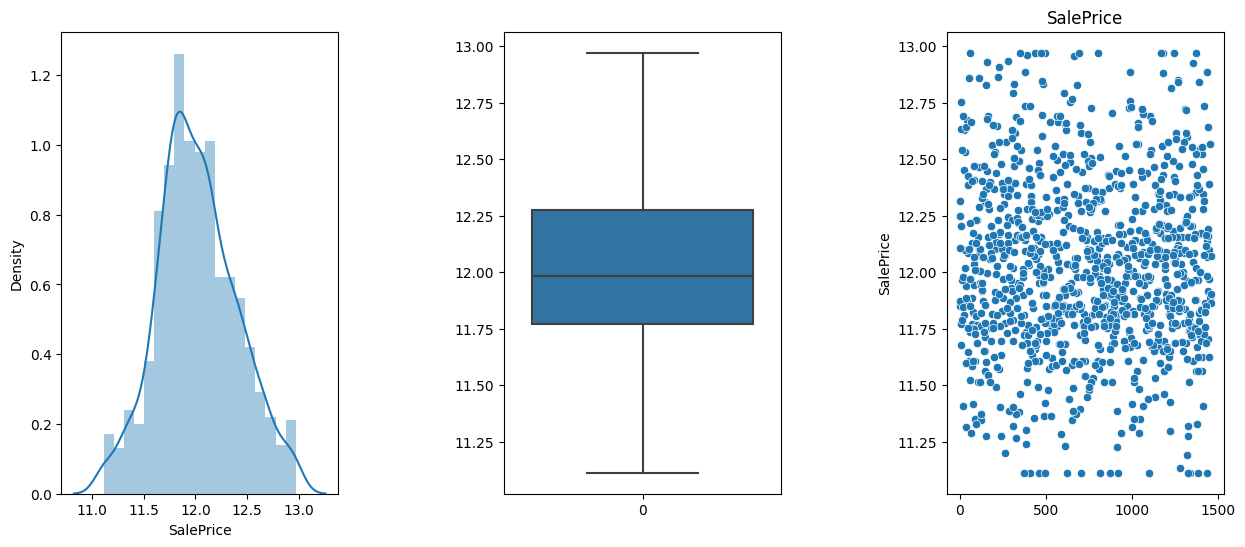

In [70]:
# Visualizing Target varaible after apply log transformation

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.distplot(y_train)

plt.subplot(1,3,2)
sns.boxplot(y_train)

plt.subplot(1,3,3)
sns.scatterplot(y_train)

plt.subplots_adjust(wspace=0.6) 
plt.title('SalePrice')
plt.show()

## Applying Linear Regression after applying log transformation on Target variable

In [71]:
# Initialize LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predicting y_train_pred
y_train_pred_lr = lr.predict(X_train)

In [73]:
# Find the value of r squared
r2_score(y_train, y_train_pred_lr)

0.9558554469451381

In [74]:
# Making prediction on test dataset
y_test_pred_lr = lr.predict(X_test)

In [75]:
# Calculating residuals
residuals_lr_test = y_test - y_test_pred_lr

In [76]:
mse = mean_squared_error(y_test, y_test_pred_lr)
r_squared = r2_score(y_test, y_test_pred_lr)
print('r_square_value :',r_squared)
print('Mean_Squared_Error :' ,mse)

r_square_value : -1.5351583851641183e+22
Mean_Squared_Error : 2.269361182984649e+21


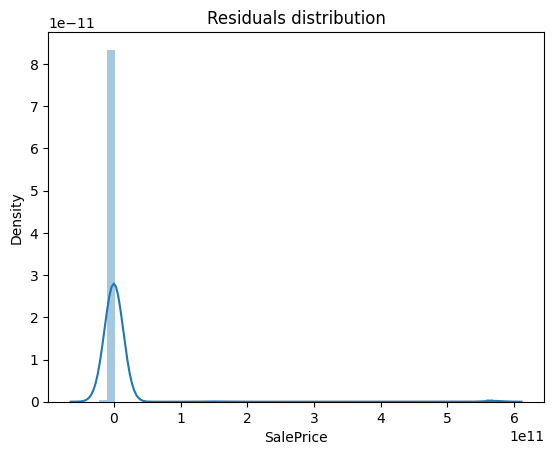

In [77]:
# Visualizing residual distribution
fig = plt.figure()
sns.distplot(residuals_lr_test, kde=True)
plt.title("Residuals distribution")
plt.show()

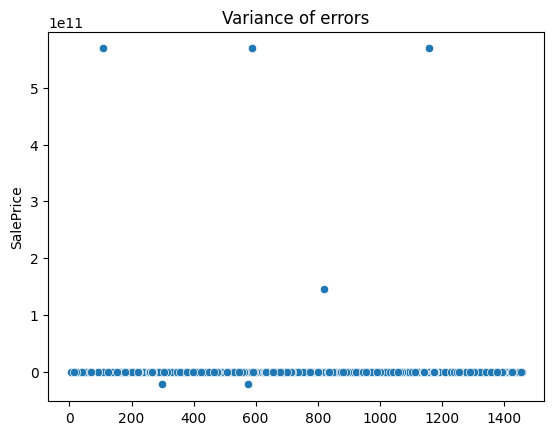

In [78]:
# Visualizing Homoscedasticity of errors
fig = plt.figure()
sns.scatterplot(residuals_lr_test)
plt.title("Variance of errors")
plt.show()

In [79]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred_lr)
print("R2_train: " + str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred_lr)
print("R2_test: " + str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred_lr))
print("Rss_train: " + str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred_lr))
print("Rss_test: " + str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
print("mse_train: " + str(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
print("mse_test: " + str(mse_test_lr))
metric.append(mse_test_lr**0.5)

R2_train: 0.9558554469451381
R2_test: -1.5351583851641183e+22
Rss_train: 6.591867361545038
Rss_test: 9.939801981472763e+23
mse_train: 0.006456285368800233
mse_test: 2.269361182984649e+21


There is a huge difference in R2 Train and R2 Test, which proves that the model is overfitting. To address the overfitting we add little penalty to the coefficient using Ridge and Lasso regression. 

## Ridge Regression



In [80]:
# Import library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [82]:
#Fitting Ridge model for alpha = 3.0 and printing coefficients which have been penalised
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.84034154e-02  7.95682938e-02  1.53861378e-02  2.17885159e-01
  1.70425355e-01  8.99637018e-02  7.69422823e-02 -1.13855874e-02
  4.53642913e-02 -1.18159164e-02  5.37692999e-02  4.35635690e-02
  1.00875529e-01  2.09121044e-02  2.79691859e-02  1.41735738e-01
  3.29439817e-02  5.57457523e-02  1.80307427e-01  1.29503729e-01
 -2.56346753e-02  2.43997280e-01  6.23462735e-02 -1.88517361e-02
  6.73452259e-02  4.77685924e-02  2.81659692e-02 -6.97444953e-02
  5.90806471e-02  5.32133740e-02  7.44151504e-03  7.07103708e-02
 -3.07152128e-02  7.44755115e-02  9.68269130e-02  4.57679538e-02
  1.94074290e-02  4.31403813e-02  3.01257033e-02  1.48140696e-02
  3.94244010e-02  3.33021412e-02 -5.33766986e-02 -6.55677353e-02
  4.35810547e-03  6.53909350e-03 -8.44368318e-03 -1.58068825e-02
 -6.05692170e-02  2.43410098e-02  1.19833774e-02 -3.22445477e-03
  3.32860393e-02 -2.12222075e-02  3.18741880e-02 -3.19761245e-02
 -3.17791342e-03 -3.57150827e-02  1.48502613e-02 -1.12347800e-02
  5.00755762e-02  3.97149

In [83]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
print("R2_train: " + str(r2_train_ridge))
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print("R2_test: " + str(r2_test_ridge))
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_train_pred_ridge))
print("Rss_train: " + str(rss1_ridge))
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_test_pred_ridge))
print("Rss_test: " + str(rss2_ridge))
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
print("mse_train: " + str(mse_train_ridge))
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("mse_test: " + str(mse_test_ridge))
metric2.append(mse_test_ridge**0.5)

R2_train: 0.9390733656686427
R2_test: 0.906254206787839
Rss_train: 9.097844796356597
Rss_test: 6.0698272577611405
mse_train: 0.008910719683013317
mse_test: 0.01385805309991128


In [84]:
residuals_ridge = y_test - y_test_pred_ridge

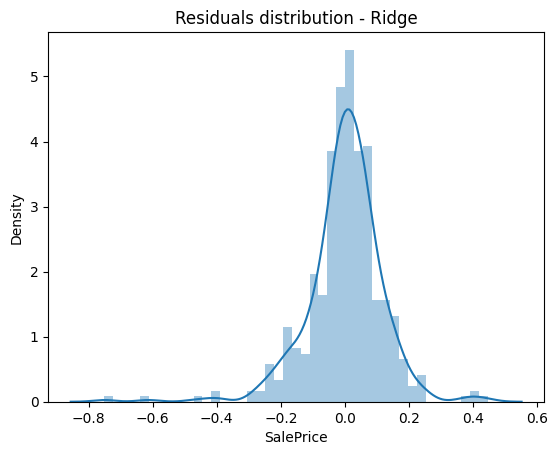

In [85]:
# Visualizing residual distribution
fig = plt.figure()
sns.distplot(residuals_ridge, kde=True)
plt.title("Residuals distribution - Ridge")
plt.show()

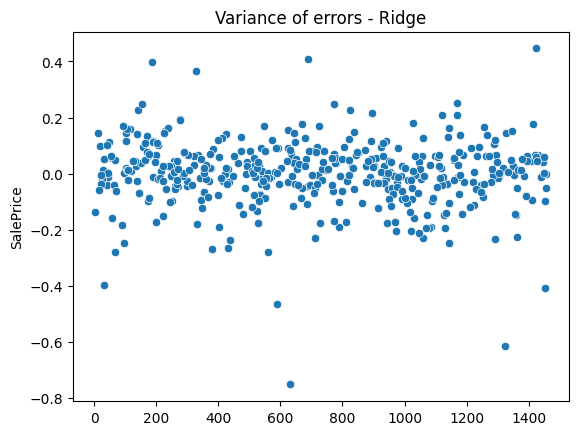

In [86]:
# Visualizing Homoscedasticity of errors
fig = plt.figure()
sns.scatterplot(residuals_ridge)
plt.title("Variance of errors - Ridge")
plt.show()

## Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [89]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [90]:
lasso.coef_

array([ 0.00000000e+00,  4.70631529e-02,  0.00000000e+00,  3.87414404e-01,
        2.28583544e-01,  1.36671558e-01,  7.03337636e-02,  0.00000000e+00,
        3.88229948e-03, -0.00000000e+00,  8.65441843e-03,  0.00000000e+00,
        8.53598892e-02,  0.00000000e+00, -0.00000000e+00,  2.01845167e-01,
        2.82652053e-02,  4.00338958e-02,  0.00000000e+00,  0.00000000e+00,
       -1.39647397e-02,  6.16162826e-01,  5.54695495e-02, -0.00000000e+00,
        0.00000000e+00,  1.53677953e-02,  0.00000000e+00, -6.00234508e-02,
        4.55484404e-02,  0.00000000e+00,  0.00000000e+00,  7.56999175e-02,
        0.00000000e+00,  1.01126787e-01,  6.34397821e-02,  0.00000000e+00,
        0.00000000e+00,  2.89041284e-02,  4.04276370e-03,  0.00000000e+00,
        0.00000000e+00,  7.86163532e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -3.78150540e-02,  2.02620029e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [91]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
print("R2_train: " + str(r2_train_lasso))
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
print("R2_test: " + str(r2_test_lasso))
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_train_pred_lasso))
print("Rss_train: " + str(rss1_lasso))
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_test_pred_lasso))
print("Rss_test: " + str(rss2_lasso))
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
print("mse_train: " + str(mse_train_lasso))
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("mse_test: " + str(mse_test_lasso))
metric3.append(mse_test_lasso**0.5)

R2_train: 0.925068086441907
R2_test: 0.9029952777783361
Rss_train: 11.189177398802705
Rss_test: 6.280835511627224
mse_train: 0.010959037609013424
mse_test: 0.014339807104171744


In [92]:
residuals_lasso = y_test - y_test_pred_lasso

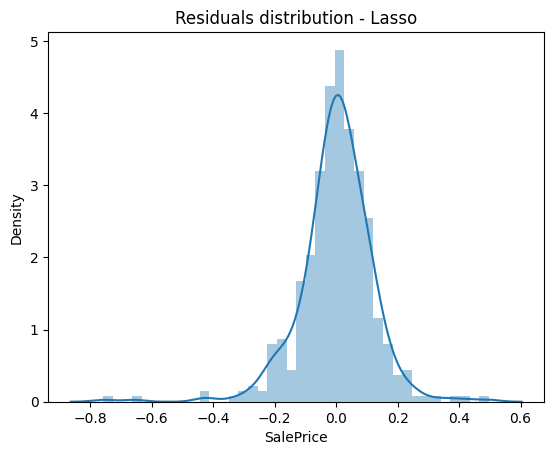

In [93]:
# Visualizing residual distribution
fig = plt.figure()
sns.distplot(residuals_lasso, kde=True)
plt.title("Residuals distribution - Lasso")
plt.show()

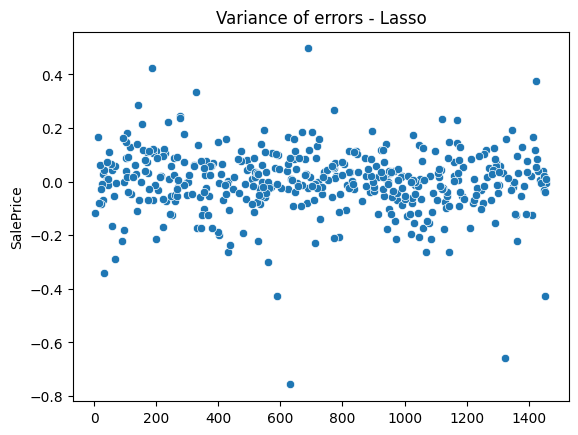

In [94]:
# Visualizing Homoscedasticity of errors
fig = plt.figure()
sns.scatterplot(residuals_lasso)
plt.title("Variance of errors - Lasso")
plt.show()

In [95]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.558554e-01          0.939073          0.925068
1   R2 Score (Test)      -1.535158e+22          0.906254          0.902995
2       RSS (Train)       6.591867e+00          9.097845         11.189177
3        RSS (Test)       9.939802e+23          6.069827          6.280836
4       MSE (Train)       8.035101e-02          0.094397          0.104685
5        MSE (Test)       4.763781e+10          0.117720          0.119749

## Observing the coefficients

In [96]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [97]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [98]:
ind = ['OverallCond', 'YearBuilt', 'GarageArea', 'LotArea', 'MSZoning_FV' ]
betas.loc[ind]

Linear     Ridge     Lasso
OverallCond  0.328742  0.170425  0.228584
YearBuilt    0.290319  0.089964  0.136672
GarageArea   0.154744  0.096827  0.063440
LotArea      0.233020  0.079568  0.047063
MSZoning_FV  0.271892  0.050076  0.000000

In [99]:
pd.set_option('display.max_rows', None)
betas.head(10)

Linear     Ridge     Lasso
LotFrontage   0.020327  0.028403  0.000000
LotArea       0.233020  0.079568  0.047063
Street        0.084099  0.015386  0.000000
OverallQual   0.345800  0.217885  0.387414
OverallCond   0.328742  0.170425  0.228584
YearBuilt     0.290319  0.089964  0.136672
YearRemodAdd  0.048046  0.076942  0.070334
MasVnrArea    0.025383 -0.011386  0.000000
ExterQual     0.026877  0.045364  0.003882
ExterCond    -0.066028 -0.011816 -0.000000

In [100]:
betas_abs = abs(betas)
#['GrLivArea','OverallQual','1stFlrSF','OverallCond','TotalBsmtSF']

In [101]:
betas_abs.sort_values(by='Ridge', ascending=False).head(10)

Linear     Ridge     Lasso
GrLivArea             0.699134  0.243997  0.616163
OverallQual           0.345800  0.217885  0.387414
1stFlrSF              0.111769  0.180307  0.000000
OverallCond           0.328742  0.170425  0.228584
TotalBsmtSF           0.298702  0.141736  0.201845
2ndFlrSF              0.050794  0.129504  0.000000
Condition2_PosN       1.062149  0.115038  0.000000
BsmtFinSF1            0.039275  0.100876  0.085360
Neighborhood_MeadowV  0.045697  0.096867  0.025581
GarageArea            0.154744  0.096827  0.063440

In [102]:
betas_abs.sort_values(by='Lasso', ascending=False).head(10)

Linear     Ridge     Lasso
GrLivArea             0.699134  0.243997  0.616163
OverallQual           0.345800  0.217885  0.387414
OverallCond           0.328742  0.170425  0.228584
TotalBsmtSF           0.298702  0.141736  0.201845
YearBuilt             0.290319  0.089964  0.136672
GarageCars            0.032449  0.074476  0.101127
Neighborhood_Crawfor  0.187772  0.092464  0.097862
Neighborhood_Somerst  0.081190  0.074258  0.092959
BsmtFinSF1            0.039275  0.100876  0.085360
FireplaceQu           0.032730  0.070710  0.075700

## Conclusion
Important variables
1. When using Ridge model, GrLivArea, OverallQual, 1stFlrSF, OverallCond and TotalBsmtSF
2. When using lasso model  GrLivArea, OverallQual, OverallCond, TotalBsmtSF and YearBuilt